In [1]:
import numpy as np
import matplotlib.pyplot as plt

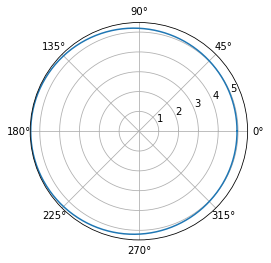

In [7]:
cos = np.cos
pi = np.pi

a = 5.204 
e = 0.0489
theta = np.linspace(0, 2*pi, 360) #unit: degrees
r = (a*(1-e**2))/(1+e*cos(theta)) #unit: AU
plt.polar(theta, r)

plt.show()